### TASKS - Titanic data

In [61]:
import pandas as pd

# Load the titanic dataset into a DataFrame
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



1. Line Plot:
   * Task 1: Create a line plot showing the trend of average age of passengers based on their travel class (1st, 2nd, and 3rd).

   * Task 2: Create a line plot showing the trend of survival rate of passengers based on their age group (child, adult, elderly).

2. Scatter Plot:
   * Task 1: Visualize the relationship between age and fare paid by passengers. Additionally, differentiate the points by their survival status (survived vs. not survived).

   * Task 2: Create a scatter plot showing the relationship between age and fare paid by passengers, differentiated by their gender (male vs. female).
  
3. Bar Plot:
   * Task 1: Plot a bar plot showing the count of passengers who survived and who did not survive based on their gender (male vs. female).
   
   * Task 2: Plot a bar plot showing the count of passengers who survived and who did not survive based on their travel class (1st, 2nd, and 3rd).

4. Box Plot:
   * Task 1: Visualize the distribution of fares paid by passengers based on their embarkation port (Cherbourg, Queenstown, Southampton).
  
   * Task 2: Visualize the distribution of ages of passengers based on their survival status (survived vs. not survived).

In [62]:
import matplotlib.pyplot as plt

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64
   Class    Avg_age
0      1  38.233441
1      2  29.877630
2      3  25.140620


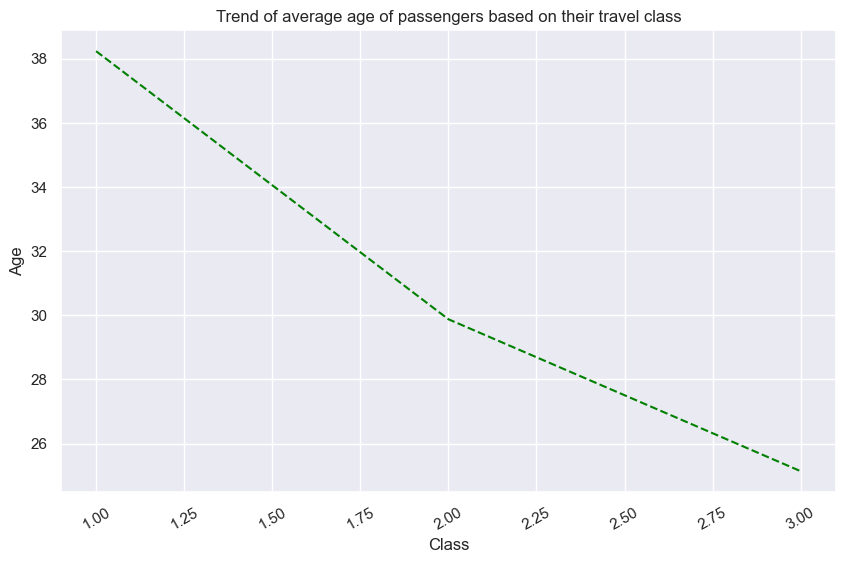

In [63]:
#verifying data
print (df[df['Pclass']==1]['Age'].describe())

#creating a dataframe for different class and corresponding avg age
df1=pd.DataFrame({'Class' : [1,2,3],
                  'Avg_age' : [ df[df['Pclass']==class_l]['Age'].mean() for class_l in range(1,4) ]})
print(df1)
plt.figure(figsize=(10, 6))   #Figure size (width, height)
plt.plot(df1['Class'],df1['Avg_age'] , color ='green', linestyle = '--')
plt.title('Trend of average age of passengers based on their travel class') #Title of graph
plt.xlabel('Class')  #X axis label
plt.ylabel('Age')   #Y axis label
plt.grid(True)  #Adding grids to the plot  
plt.xticks(rotation = 30)   #Rotating the x axis labels
plt.show()   #Printing the graph

213


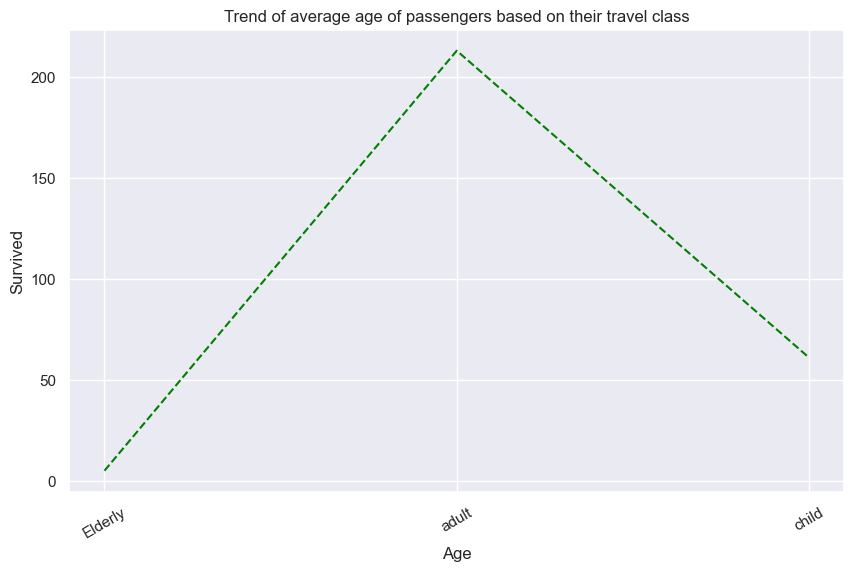

In [82]:
# Testing
print(df[(df['Age']>18) & (df['Age']<60) & (df['Survived']==1)].shape[0])

#creating a dataframe for different Survival rates and corresponding Age group
df2=pd.DataFrame({'Survival' : [df[(df['Age']>60) & (df['Survived']==1)].shape[0],
                               df[(df['Age']>18) & (df['Age']<60) & (df['Survived']==1)].shape[0],
                               df[(df['Age']<18) & (df['Survived']==1)].shape[0]],
                  'Age_category' : [ 'Elderly','adult', 'child']})
#print(df1)
plt.figure(figsize=(10, 6))   #Figure size (width, height)
plt.plot(df2['Age_category'],df2['Survival'] , color ='green', linestyle = '--')
plt.title('Trend of average age of passengers based on their travel class') #Title of graph
plt.xlabel('Age')  #X axis label
plt.ylabel('Survived')   #Y axis label
plt.grid(True)  #Adding grids to the plot  
plt.xticks(rotation = 30)   #Rotating the x axis labels
plt.show()   #Printing the graph

In [50]:
import seaborn as sns
sns.set_theme()

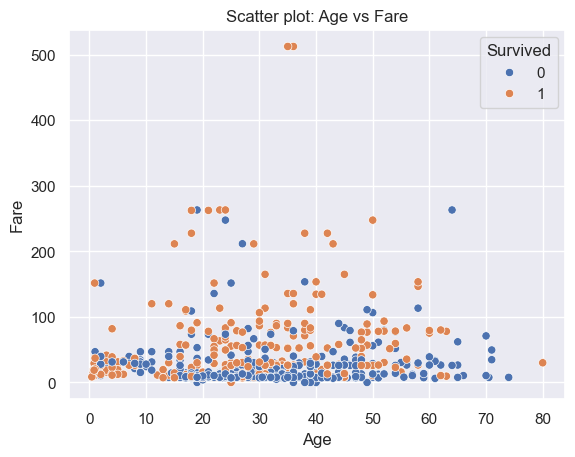

In [65]:
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])
plt.title('Survived: Age vs Fare')
plt.show()

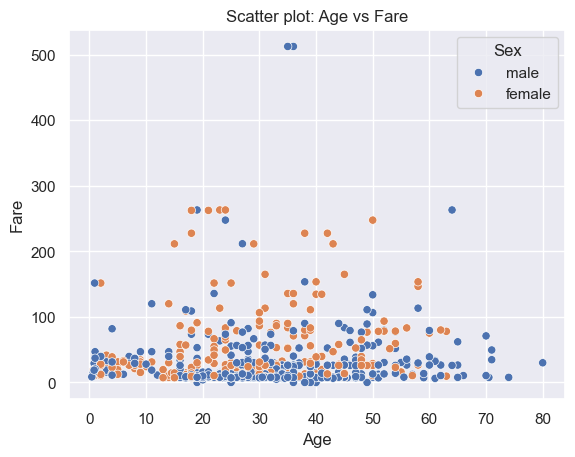

In [66]:
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Sex'])
plt.title('Sex: Age vs Fare')
plt.show()

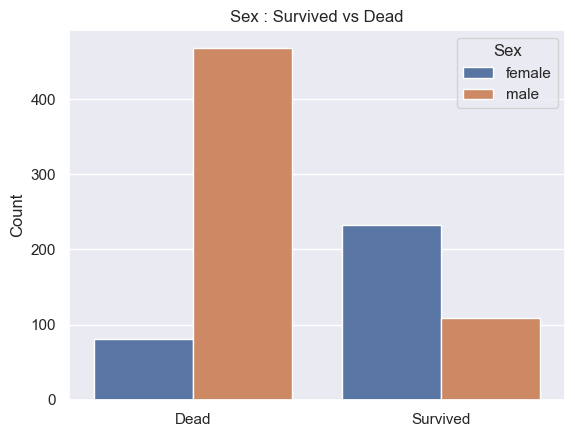

In [160]:
# Box Plot
#df[df['Survived']==0]['Sex'].value_counts()
#df2 = pd.DataFrame([df[df['Survived']==0]['Sex'].value_counts(), df[df['Survived']==1]['Sex'].value_counts()])
#df2.index = ['Dead', 'Survived']
#df2

# bar plot showing the count of passengers who survived and who did not survive based on their gender (male vs. female)
survival_count = df.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
survival_count
sns.barplot(x=survival_count['Survived'],y=survival_count['Count'],hue=survival_count['Sex'])
plt.ylabel('Count')
plt.xlabel('')
plt.xticks([0,1],['Dead','Survived'])
plt.title('Sex : Survived vs Dead')
plt.show()

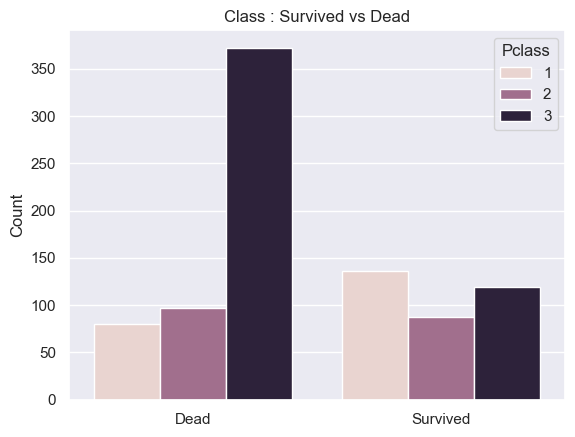

In [161]:
#bar plot showing the count of passengers who survived and who did not survive based on their travel class (1st, 2nd, and 3rd)
survival_count = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')
survival_count
sns.barplot(x=survival_count['Survived'],y=survival_count['Count'],hue=survival_count['Pclass'])
plt.ylabel('Count')
plt.xlabel('')
plt.xticks([0,1],['Dead','Survived'])
plt.title('Class : Survived vs Dead')
plt.show()

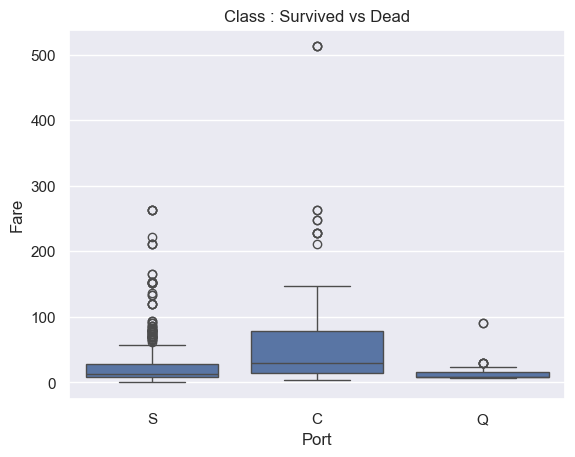

In [168]:
# Boxplot :distribution of fares paid by passengers based on their embarkation port (Cherbourg, Queenstown, Southampton)
#plt.figure(figsize=(6,16))
sns.boxplot(x=df['Embarked'],y=df['Fare'])
plt.ylabel('Fare')
plt.xlabel('Port')
plt.title('Port vs Fare')
plt.show()

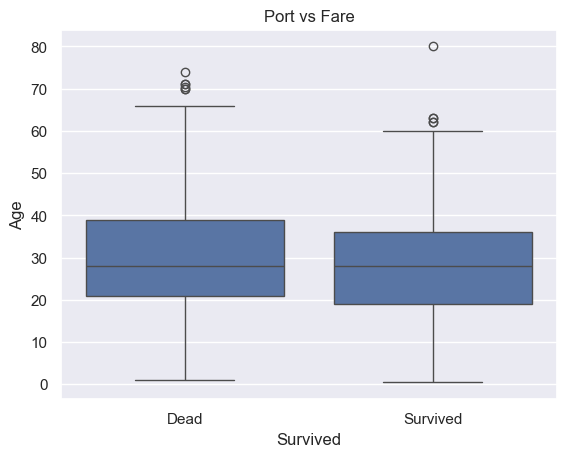

In [170]:
#BoxPlot : distribution of ages of passengers based on their survival status (survived vs. not survived)
sns.boxplot(x=df['Survived'],y=df['Age'])
plt.ylabel('Age')
plt.xlabel('Survived')
plt.title('Port vs Fare')
plt.xticks([0,1],['Dead','Survived'])
plt.show()